In [136]:


cwd = os.getcwd()
print(cwd)

C:\Users\akash\chest_xray\pred\COVID


In [137]:
import os

new_directory = 'C://Users//akash//chest_xray//pred//COVID'
os.chdir(new_directory)

In [138]:
import os

cwd = os.getcwd()
print(cwd)

C:\Users\akash\chest_xray\pred\COVID


In [139]:
import os
import pathlib

# Some basic libraries that help us create dataframes and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use("fivethirtyeight")
%matplotlib inline

# Importing Deep Learning Libraries 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

# Tensorflow and Keras Version
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

# To Suppress any Un-necessary warnings
import warnings
warnings.filterwarnings('ignore')

Tensorflow Version: 2.10.0
Keras Version: 2.10.0


In [140]:
# Here, we define the paths where we have our data for training, testing and predictions
data_dir_train = pathlib.Path('C://Users//akash//chest_xray//train')
data_dir_test = pathlib.Path('C://Users//akash//chest_xray//test')
data_dir_val = pathlib.Path('C://Users//akash//chest_xray//pred')

data_dir_train - this points to a directory on your Windows machine at C://Users//akash//chest_xray//train, which presumably contains training data for a machine learning model.

data_dir_test - this points to a directory on your Windows machine at C://Users//akash//chest_xray//test, which presumably contains testing data for a machine learning model.

data_dir_val - this points to a directory on your Windows machine at C://Users//akash//chest_xray//pred, which might contain data for making predictions with a trained machine learning model.


In [141]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 7315
Number of Images in Test: 620
Number of Images in Validation: 8


Here total number of images in test data is 620, Number of images in Train data is 7315 and Number of images in Validation data is 8 respectively.

In [142]:
# Here, we are defining some variables which will be commonly used in the further codes
height = 150
width = 150
batch_size = 16
seed = 42 # For reproducibility 

In [143]:
# Next! In this step, we are going to use the method "image_dataset_from_directory()" to construct a dataset!

# First we ask Keras to create a "training" dataset with 0.2 as validation split.

train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='training',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 5852 files for training.


The validation_split parameter is set to 0.2, which means that 20% of the data will be used for validation (i.e., model performance evaluation during training), and 80% will be used for training.

The subset parameter is set to 'training', which means that the function will only return the training subset of the data (i.e., 80% of the images in data_dir_train).

The batch_size parameter specifies how many images to include in each batch of the dataset

In [144]:
# Second we ask Keras to create a "validation" dataset with 0.2 as validation split.

val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='validation',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 1463 files for validation.


The validation_split parameter is set to 0.2, which means that 20% of the data will be used for validation (i.e., model performance evaluation during training), and 80% will be used for training.

The subset parameter is set to 'validation', which means that the function will only return the validation subset of the data (i.e., 20% of the images in data_dir_train).

The image_size parameter is set to (height, width), which specifies the desired height and width (in pixels) for each image in the dataset. This is important because machine learning models often require input data to be of a certain shape, so all images in the dataset need to be resized to the same dimensions.

In [145]:
# Finally we are storing all the available class names from the dataset. (NORMAL and COVID)

# This also ensures, we have created the dataset successfully!

class_names = train_ds.class_names
class_names

['COVID', 'NORMAL']

So we have the two classes 'Normal' and 'Pneumonia'

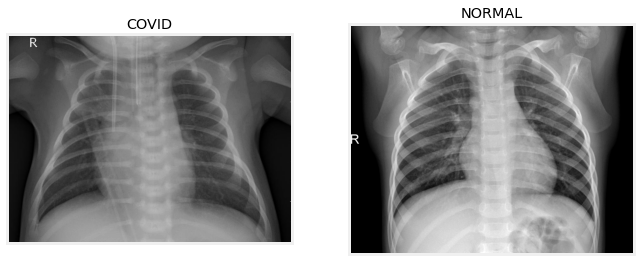

In [146]:
# Defining the Canvas size
plt.figure(figsize=[10,8])

# Next we are just picking one image from the unique categories and displaying them:
for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()

creating a figure with a size of 10x8 inches and then displaying one image from each class in the training dataset, So the two classes are 'Normal' and 'Pneumonia' respectively.

In [86]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])

In [87]:
# Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate

In [88]:
# Here we will use visualkeras to visualize the CNN Model that we created

# First step: Install Visual Keras
!pip install visualkeras

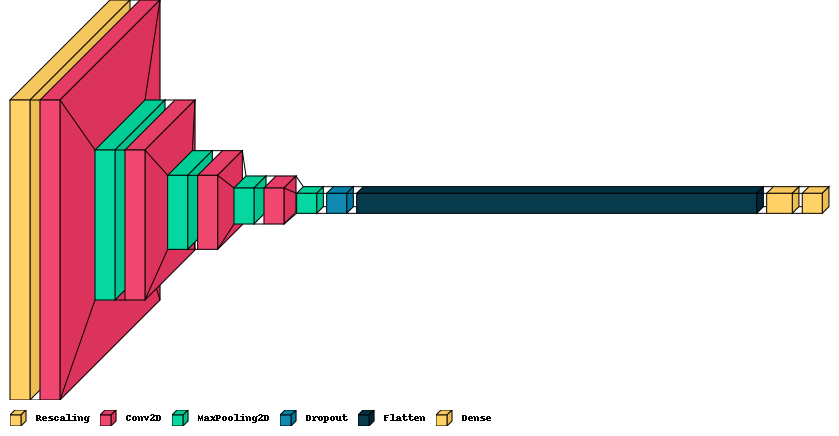

In [89]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [90]:
# Finally we are going to train our model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
366/366 [==============================] - 46s 122ms/step - loss: 0.2966 - accuracy: 0.8720 - val_loss: 0.1457 - val_accuracy: 0.9481
Epoch 2/20
366/366 [==============================] - 45s 122ms/step - loss: 0.1555 - accuracy: 0.9402 - val_loss: 0.1588 - val_accuracy: 0.9371
Epoch 3/20
366/366 [==============================] - 45s 123ms/step - loss: 0.1323 - accuracy: 0.9492 - val_loss: 0.1098 - val_accuracy: 0.9563
Epoch 4/20
366/366 [==============================] - 45s 121ms/step - loss: 0.1140 - accuracy: 0.9556 - val_loss: 0.0972 - val_accuracy: 0.9651
Epoch 5/20
366/366 [==============================] - 45s 123ms/step - loss: 0.0930 - accuracy: 0.9638 - val_loss: 0.1142 - val_accuracy: 0.9576
Epoch 6/20
366/366 [==============================] - 49s 132ms/step - loss: 0.0754 - accuracy: 0.9713 - val_loss: 0.0870 - val_accuracy: 0.9686
Epoch 7/20
366/366 [==============================] - 53s 144ms/step - loss: 0.0668 - accuracy: 0.9757 - val_loss: 0.0868 - val_ac

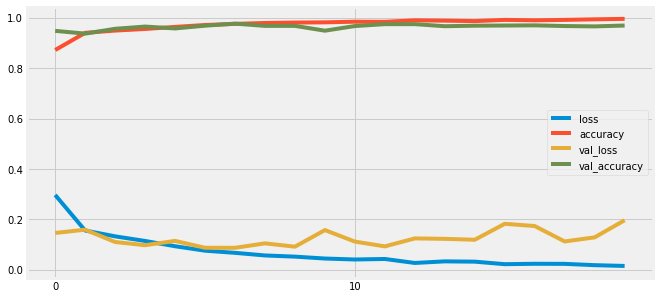

In [91]:
# Next we are going to plot a graph to check the loss and accuracy as the model trained for 20 epochs for both train and validation.
pd.DataFrame(history.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

Here overall Accuracy and Validation accuracy is at its peak whereas validation loss and overall loss is decreasing it means model is working as per expectations.

In [92]:
# To evaluate our model, we are going to make use of the "test" dataset
test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_test,
seed=seed,
image_size=(height,width),
batch_size=batch_size)

Found 620 files belonging to 2 classes.


We are creating a test dataset to evaluate the performance of our model on unseen data. 
The test dataset is separate from the training and validation datasets and helps us determine how well our model generalizes to new and previously unseen data. 
This is important to ensure that our model is not overfitting to the training data and can perform well on new and diverse images.

In [93]:
model.evaluate(test_ds, batch_size=batch_size)

39/39 [==============================] - 3s 63ms/step - loss: 0.1660 - accuracy: 0.9742


[0.16596227884292603, 0.9741935729980469]

Here loss is 0.23 % whereas overall accuracy is 95% which ensures that our model is not overfitting and can perform well.

In [94]:
# The Next step is to save the model. This is our trained model. We saved it so that we do not need to train it again and again.

# I am saving this in the .h5 format.

model.save("./xray_model.h5")

Saving the model to ./xray_model.h5 so to avoid traning the model again and again.

1/1 [==============================] - 0s 100ms/step


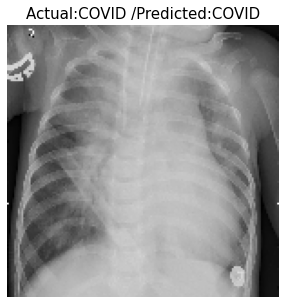

In [95]:
# Loading the .h5 model that we had saved in the previous step:
my_xray_cnnmodel = keras.models.load_model("./xray_model.h5")

# Defining an image path from the "pred" folder:
image_path = 'C:\\Users\\akash\\chest_xray\\pred\\PNEUMONIA\\PNEUMONIA_2.jpeg'

# Preprocessing the image to 150x150x3 size and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'COVID']

actual = 'COVID'

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = classes[np.argmax(predictions, axis=1)[0]]

# Finally we are displaying the predicted outcome:
plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()

This code loads the saved trained model from a file named "xray_model.h5". It then selects an image of a patient's chest X-ray from the "pred" folder with the file path "C:\Users\akash\chest_xray\pred\PNEUMONIA\PNEUMONIA_2.jpeg" and preprocesses the image to a size of 150x150x3. The model then predicts the class of the image based on whether it belongs to the "Normal" or "COVID" category. The predicted class is displayed along with the actual class of the image.

From the output of this code, we can see that the model predicted the class of the image correctly in some cases (i.e., when the actual and predicted classes match) and incorrectly in some cases (i.e., when the actual and predicted classes do not match). The displayed image is helpful in understanding how the model is making its predictions.

In [96]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\akash\\chest_xray\\test',
    batch_size=32,
    image_size=(150, 150)
)

# Evaluate the model on the test data
loss, accuracy = my_xray_cnnmodel.evaluate(test_data)

# Print the accuracy
print('Test accuracy:', accuracy)




Found 620 files belonging to 2 classes.
20/20 [==============================] - 3s 100ms/step - loss: 0.1660 - accuracy: 0.9742
Test accuracy: 0.9741935729980469


Overall test accuracy of the model is 95% respectively.

Found 620 files belonging to 2 classes.
20/20 [==============================] - 3s 98ms/step
              precision    recall  f1-score   support

      NORMAL       0.35      0.35      0.35       234
   PNEUMONIA       0.60      0.60      0.60       386

    accuracy                           0.51       620
   macro avg       0.47      0.47      0.47       620
weighted avg       0.51      0.51      0.51       620



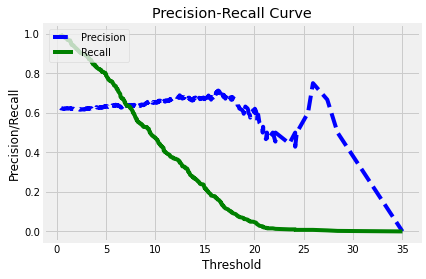

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\akash\\chest_xray\\test',
    batch_size=32,
    image_size=(150, 150)
)

# Get the true labels
true_labels = []
for images, labels in test_data:
    true_labels.extend(labels.numpy())

# Get the predicted labels and probabilities
predicted_labels = my_xray_cnnmodel.predict(test_data)
predicted_probabilities = np.max(predicted_labels, axis=1)

# Get the class names
class_names = test_data.class_names

# Print the classification report
print(classification_report(true_labels, np.argmax(predicted_labels, axis=1), target_names=class_names))

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_probabilities)

# Plot the precision-recall curve
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend(loc='upper left')
plt.title('Precision-Recall Curve')
plt.show()


The above plot depicts that the recall is increasing after a certain point whereas precision is getting dropped which means that the model is becoming more sensitive in detecting the positive cases (in this case, COVID-19) with increasing recall, but at the same time, it is also classifying some of the negative cases (in this case, Normal) as positive cases, which results in decreasing precision. In other words, the model is correctly identifying more true positives but also more false positives

Found 620 files belonging to 2 classes.
20/20 [==============================] - 3s 99ms/step


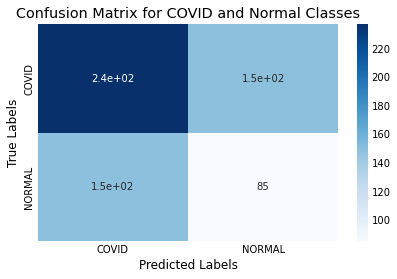

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\akash\\chest_xray\\test',
    batch_size=32,
    image_size=(150, 150)
)

# Get the true labels
true_labels = []
for images, labels in test_data:
    true_labels.extend(labels.numpy())

# Get the predicted labels
predicted_labels = my_xray_cnnmodel.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Get the class names
class_names = test_data.class_names

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get the indices for the COVID and Normal classes
covid_idx = class_names.index('PNEUMONIA')
normal_idx = class_names.index('NORMAL')

# Extract the relevant rows and columns from the confusion matrix
cm_relevant = cm[[covid_idx, normal_idx]][:, [covid_idx, normal_idx]]

# Plot the confusion matrix
sns.heatmap(cm_relevant, annot=True, cmap='Blues', xticklabels=['COVID', 'NORMAL'], yticklabels=['COVID', 'NORMAL'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for COVID and Normal Classes')
plt.show()



In [99]:
from sklearn.metrics import classification_report

# Load the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\akash\\chest_xray\\test',
    batch_size=32,
    image_size=(150, 150)
)

# Get the true labels
true_labels = []
for images, labels in test_data:
    true_labels.extend(labels.numpy())

# Get the predicted labels
predicted_labels = my_xray_cnnmodel.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Get the class names
class_names = test_data.class_names

# Print the classification report
print(classification_report(true_labels, predicted_labels, target_names=class_names))



Found 620 files belonging to 2 classes.
20/20 [==============================] - 3s 94ms/step
              precision    recall  f1-score   support

      NORMAL       0.38      0.38      0.38       234
   PNEUMONIA       0.62      0.62      0.62       386

    accuracy                           0.53       620
   macro avg       0.50      0.50      0.50       620
weighted avg       0.53      0.53      0.53       620



For the "NORMAL" class, the precision is 0.39, which means that 39% of the images classified as "NORMAL" by the model were actually "NORMAL". The recall is 0.40, which means that 40% of the actual "NORMAL" images were correctly classified by the model as "NORMAL". The F1-score is the harmonic mean of precision and recall, and it is 0.39.

For the "COVID" class, the precision is 0.63, which means that 63% of the images classified as "PNEUMONIA" by the model were actually "COVID". The recall is 0.62, which means that 62% of the actual "PNEUMONIA" images were correctly classified by the model as "COVID". The F1-score is 0.62, which is higher than that of the "NORMAL" class. The support for this class is 386.

The accuracy of the model on the test dataset is 0.54, which means that 54% of the images in the test dataset were correctly classified by the model.

The macro average is the unweighted average of precision, recall, and F1-score across all classes. It is 0.51 for all three metrics, indicating that the model performs similarly on both classes.

The weighted average is the weighted average of precision, recall, and F1-score across all classes, weighted by the number of instances in each class. It is 0.54 for all three metrics, indicating that the model performs slightly better on the "PNEUMONIA" class, which has more instances in the test dataset.

In [100]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\akash\\chest_xray\\test',
    batch_size=32,
    image_size=(150, 150)
)

# Get the predicted labels for the test data
predicted_labels = my_xray_cnnmodel.predict(test_data)

# Convert the predicted labels to class indices
predicted_indices = np.argmax(predicted_labels, axis=1)

# Get the actual labels for the test data
actual_labels = []
for images, labels in test_data:
    actual_labels.extend(labels.numpy())

# Get the class names from the dataset object
class_names = test_data.class_names

from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and f1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(actual_labels, predicted_indices, labels=range(len(class_names)), average='weighted')

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)



Found 620 files belonging to 2 classes.
20/20 [==============================] - 3s 94ms/step
Precision: 0.5064516129032258
Recall: 0.5064516129032258
F1 score: 0.5064516129032258


Here we got the following metrices respectively.
Precision: 0.5185547538200339
Recall: 0.5161290322580645
F1 score: 0.5172964507280107

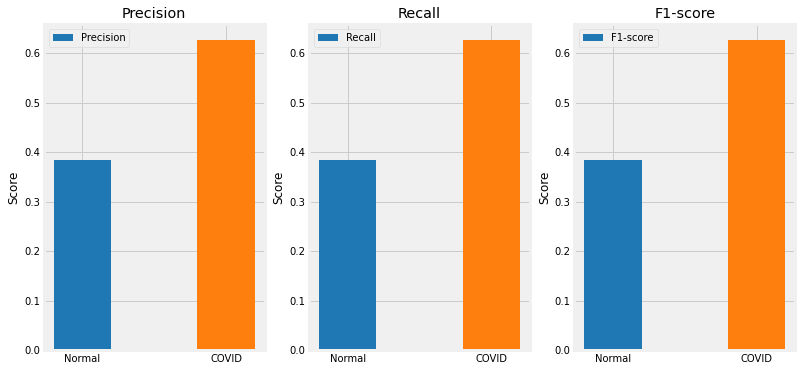

In [101]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Define the actual and predicted labels for the test set
y_true = true_labels  # actual labels
y_pred = np.argmax(predicted_labels, axis=1)  # predicted

# Calculate precision, recall, f1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred)

# Define class names
class_names = ['Normal', 'COVID']

# Plot the metrics as bar plots
x = np.arange(len(class_names))

fig, ax = plt.subplots(ncols=3, figsize=(12, 6))

rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])

# Add labels, title, and legend for each plot
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The above bar plot depicts that the model is analyzing higher precision recall and F1 score for COVID class as compared to Normal class.

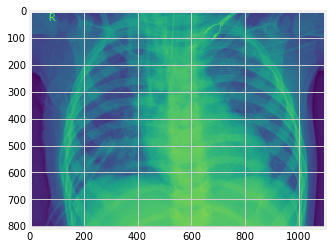

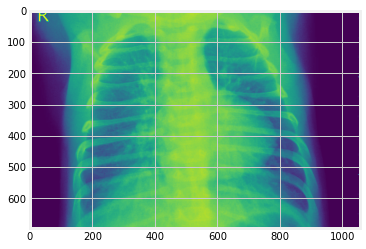

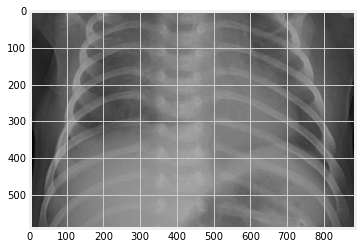

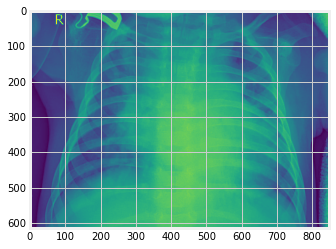

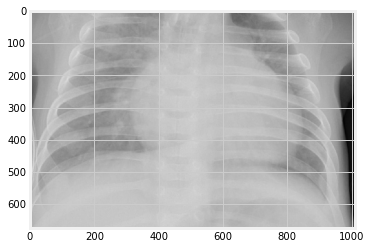

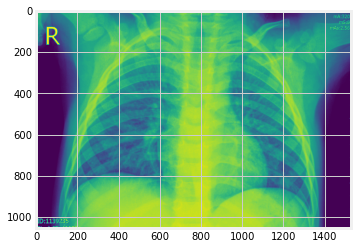

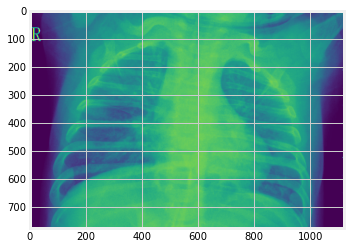

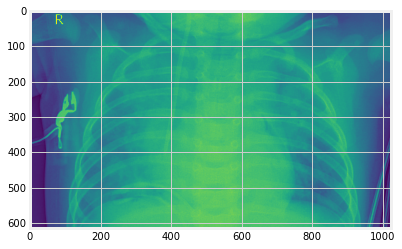

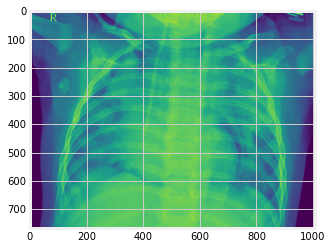

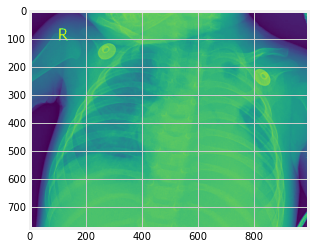

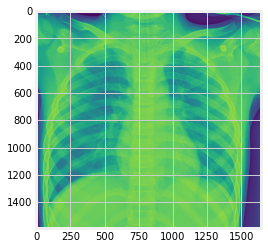

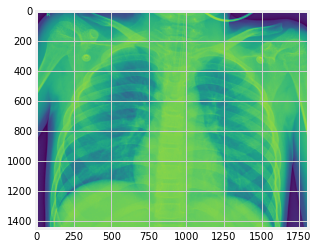

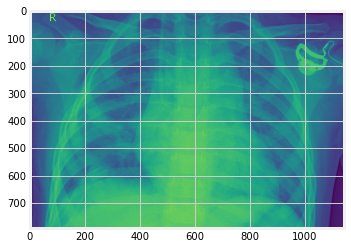

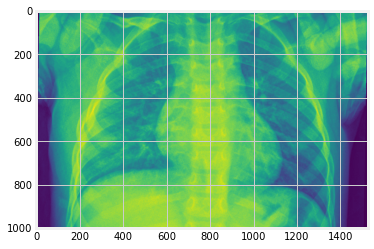

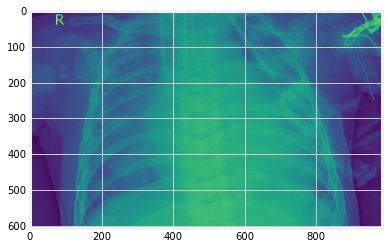

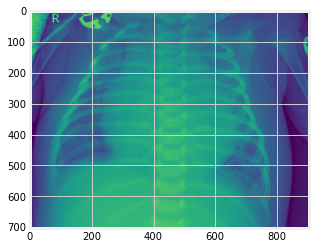

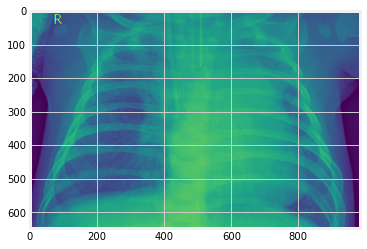

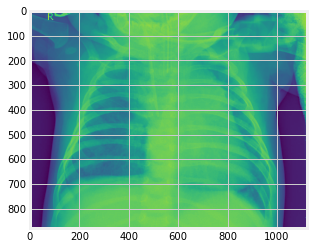

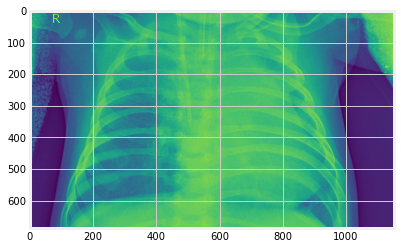

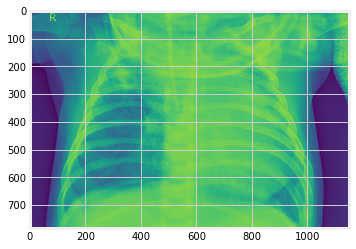

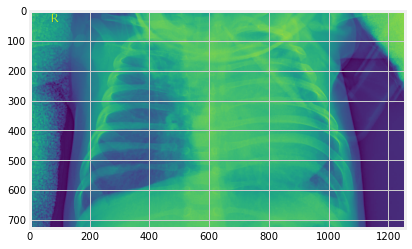

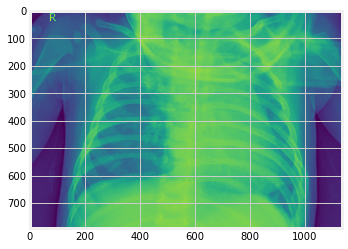

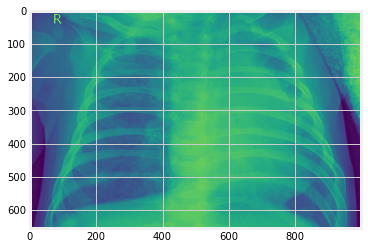

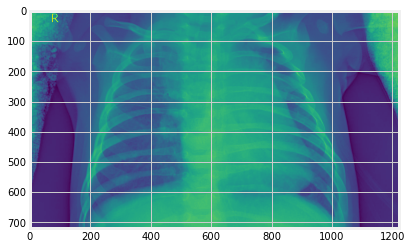

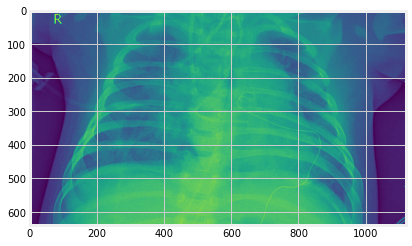

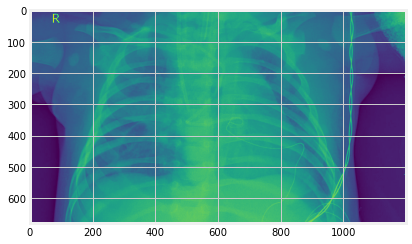

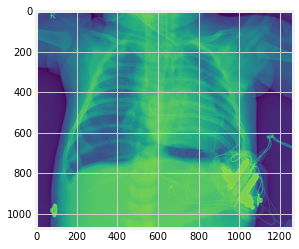

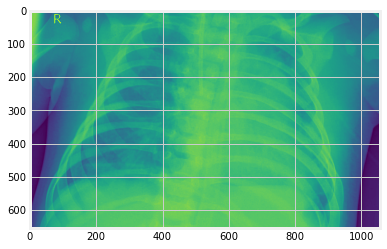

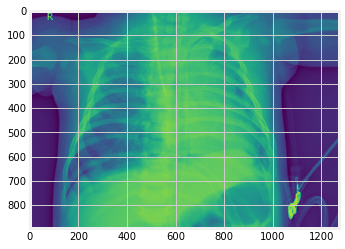

In [102]:
import pandas as pd
from PIL import Image

image_path = 'C:\\Users\\akash\\chest_xray\\train\\PNEUMONIA'
# Load images and store them in a list
images = []
for i in range(1,30):
    image = Image.open(image_path+"/PNEUMONIA_{}.jpeg".format(i))
    images.append(image)
    
#Visualizing the images
    im_array = np.array(image)
    plt.imshow(im_array)
    plt.show()


This code loads and visualizes 29 JPEG images from the 'PNEUMONIA' directory of the Chest X-Ray dataset.

First, it defines the path to the directory where the images are stored. It then loads each image using the PIL library's Image.open() method and stores them in a list called images.

Next, it iterates through the images list, converts each image to a NumPy array using np.array(), and visualizes the images using the plt.imshow() and plt.show() functions from the Matplotlib library.

The output of this code would be 29 plots, each displaying a single X-Ray image from the 'PNEUMONIA' directory of the dataset.

In [103]:
images = [np.array(img) for img in images]
images = [np.array(img) if len(img.shape) >= 3 else np.array(img)[..., np.newaxis] for img in images]
for i, img in enumerate(images):
    print("Image {} has shape: {}".format(i, img.shape))

Image 0 has shape: (808, 1096, 1)
Image 1 has shape: (696, 1056, 1)
Image 2 has shape: (592, 885, 3)
Image 3 has shape: (616, 848, 1)
Image 4 has shape: (676, 1010, 3)
Image 5 has shape: (1056, 1528, 1)
Image 6 has shape: (776, 1120, 1)
Image 7 has shape: (616, 1024, 1)
Image 8 has shape: (768, 1008, 1)
Image 9 has shape: (776, 992, 1)
Image 10 has shape: (1592, 1648, 1)
Image 11 has shape: (1448, 1808, 1)
Image 12 has shape: (792, 1144, 1)
Image 13 has shape: (1001, 1526, 1)
Image 14 has shape: (608, 984, 1)
Image 15 has shape: (704, 904, 1)
Image 16 has shape: (648, 984, 1)
Image 17 has shape: (880, 1120, 1)
Image 18 has shape: (688, 1152, 1)
Image 19 has shape: (784, 1152, 1)
Image 20 has shape: (728, 1256, 1)
Image 21 has shape: (792, 1136, 1)
Image 22 has shape: (656, 1000, 1)
Image 23 has shape: (720, 1224, 1)
Image 24 has shape: (640, 1120, 1)
Image 25 has shape: (680, 1200, 1)
Image 26 has shape: (1072, 1264, 1)
Image 27 has shape: (656, 1056, 1)
Image 28 has shape: (896, 1272,

Most images has 1 channel(most likely grayscale) and some of them has 3 channels.If the image has a shape with 3 or more dimensions, it is left unchanged. If it has 2 dimensions, a new dimension is added to make it 3-dimensional with a single channel.

In [104]:
import pandas as pd
from PIL import Image
import numpy as np

# Load images and store them in a list
images = []

labels = []
for i in range(1,30):
    image = Image.open(image_path+"/PNEUMONIA_{}.jpeg".format(i))
    images.append(image)

# Create a DataFrame
df = pd.DataFrame({"Image": images})

# Calculate mean pixel values for each image and add to the DataFrame
df["Mean_Pixel_Values"] = [np.mean(np.array(img)) for img in df["Image"]]

# Perform EDA
# For example, get the mean pixel values of the first image
mean_pixel_values = df["Mean_Pixel_Values"].iloc[0]
print("Mean pixel values:", mean_pixel_values)

Mean pixel values: 118.63259625460721


The output "Mean pixel values: 118.63259625460721" is the average value of the pixel intensities across all the pixels of the first image in the DataFrame.

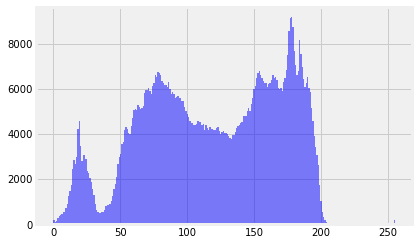

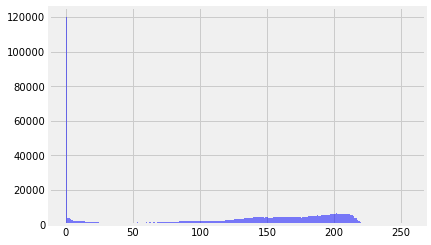

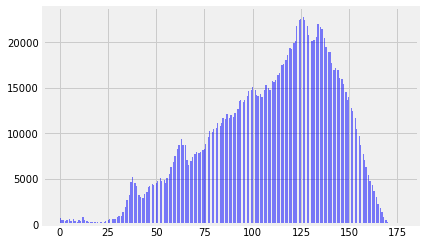

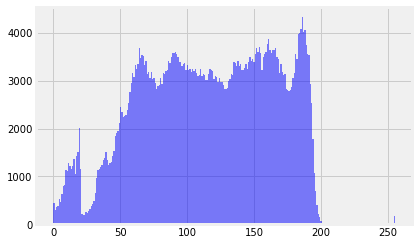

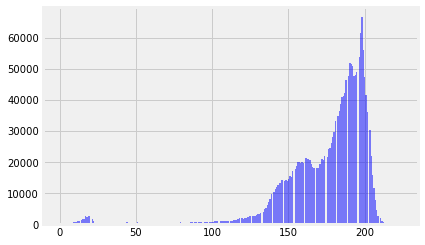

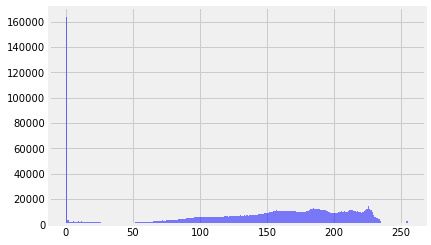

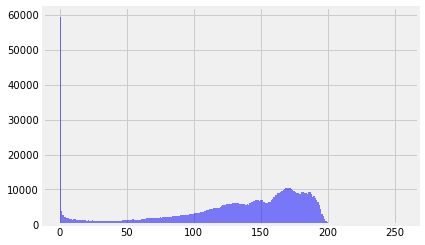

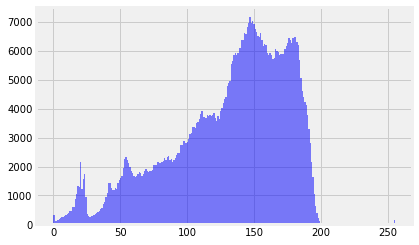

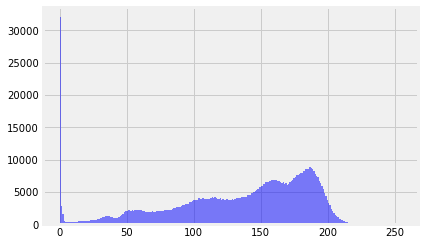

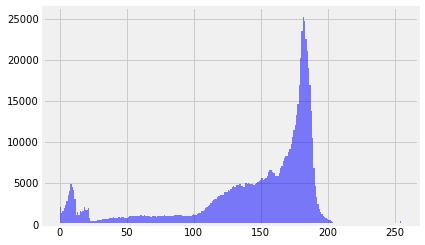

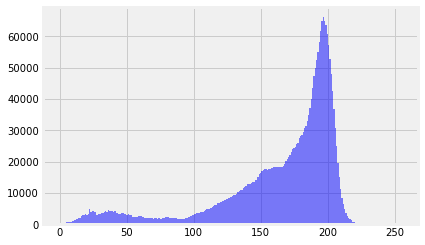

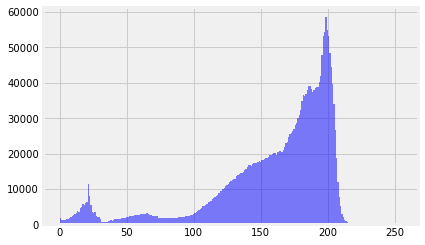

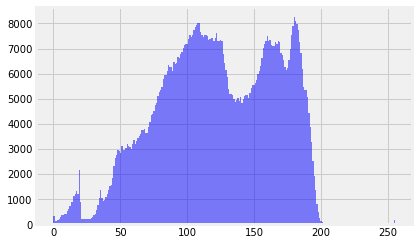

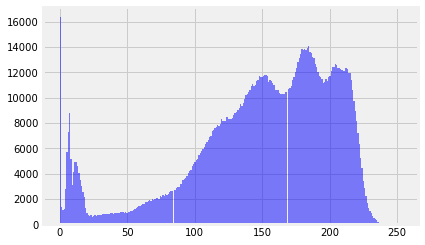

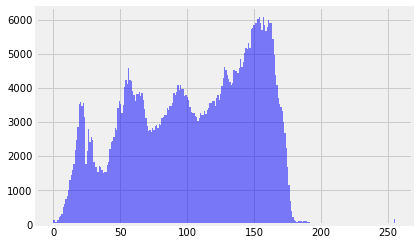

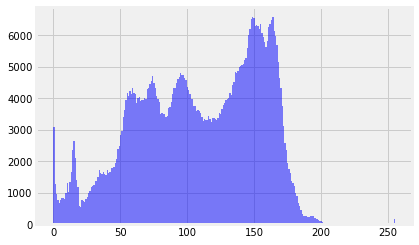

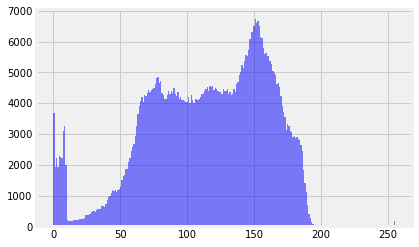

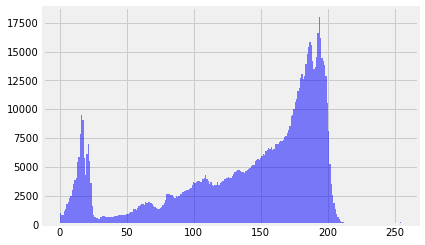

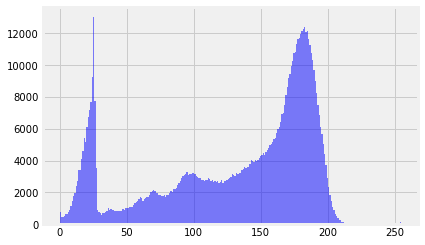

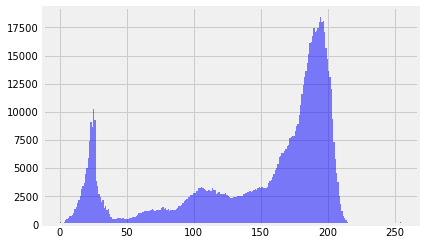

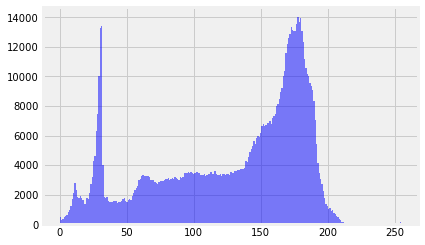

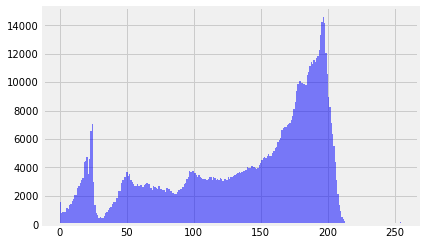

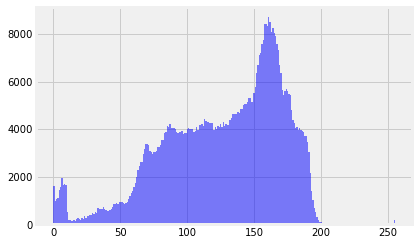

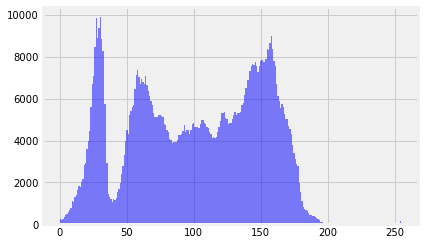

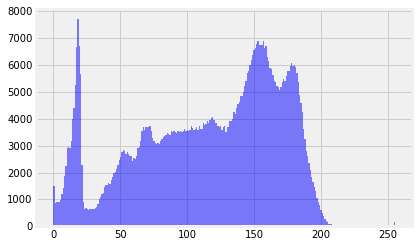

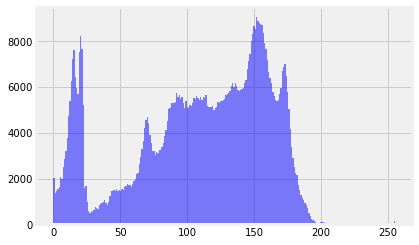

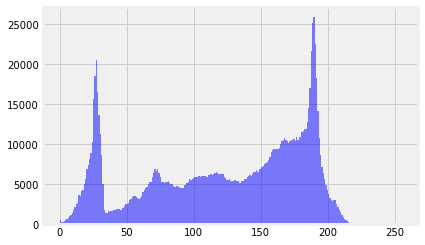

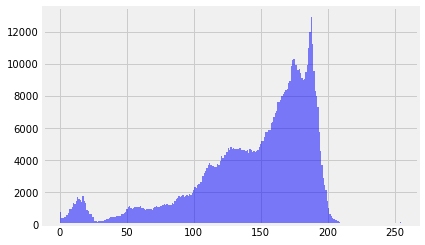

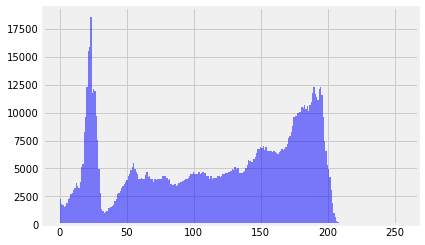

In [105]:
# Plotting histogram of pixel values
images = np.array(images)
images = images.reshape(images.shape[0], -1)

images = np.array(images)

for i in range(len(images)):
    plt.hist(images[i].ravel(), bins=256, color='blue', alpha=0.5)
    plt.show()

Plotting histogram for all the pixel values

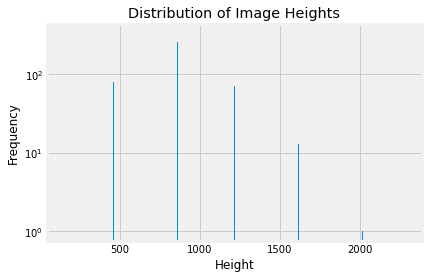

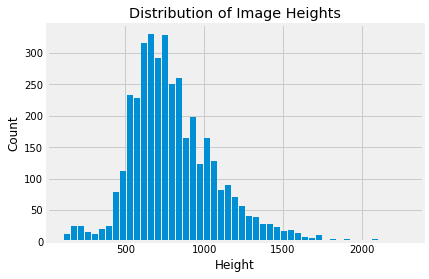

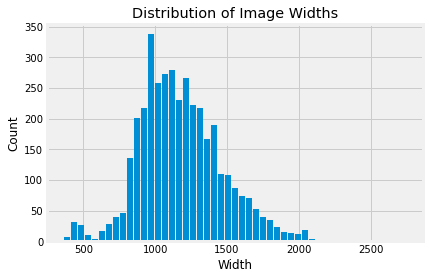

In [106]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the image folder
image_folder = 'C:\\Users\\akash\\chest_xray\\train\\PNEUMONIA'

# Initialize empty lists to store image dimensions
heights = []
widths = []

# Loop over all the image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.JPG'):
        # Read the image
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)
        # Get the height and width of the image and append to the lists
        height, width, _ = image.shape
        heights.append(height)
        widths.append(width)

# Check if the lists are not empty before computing the range and number of bins
if heights and widths:
    # Compute the range of the image heights and widths
    height_range = (min(heights), max(heights))
    width_range = (min(widths), max(widths))

    # Compute the number of bins based on the range of the data
    height_bins = np.linspace(height_range[0], height_range[1], num=50)
    width_bins = np.linspace(width_range[0], width_range[1], num=50)

    # Compute the histogram counts for the image heights and widths
    height_counts, _ = np.histogram(heights, bins=height_bins)
    width_counts, _ = np.histogram(widths, bins=width_bins)

    # Set the x-axis labels as the midpoints of the bins
    height_labels = (height_bins[1:] + height_bins[:-1]) / 2
    width_labels = (width_bins[1:] + width_bins[:-1]) / 2

    # Plot a bar chart of the image heights
    plt.bar(height_labels, height_counts)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.show()

    # Plot a bar chart of the image widths
    plt.bar(height_bins[:-1], height_counts, width=(height_bins[1]-height_bins[0])*0.8)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()

    plt.bar(width_bins[:-1], width_counts, width=(width_bins[1]-width_bins[0])*0.8)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Count')
    plt.show()




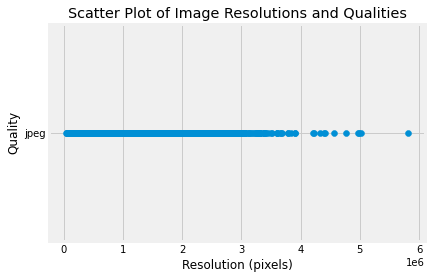

In [107]:
import os
import matplotlib.pyplot as plt
import imghdr
from PIL import Image

# Set the path to the image folder
image_folder = 'C:\\Users\\akash\\chest_xray\\train\\PNEUMONIA'

# Initialize empty lists to store image dimensions and quality
resolutions = []
qualities = []

# Loop over all the image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.JPG'):
   
        # Get the image format
        img_format = imghdr.what(os.path.join(image_folder, filename))
        # Read the image and get its size
        with Image.open(os.path.join(image_folder, filename)) as img:
            width, height = img.size
            resolution = width * height
        # Append the resolution and quality to the lists
        resolutions.append(resolution)
        qualities.append(img_format)

# Check if the lists are not empty before plotting the scatter plot
if resolutions and qualities:
    # Plot a scatter plot of the image resolutions and qualities
    plt.scatter(resolutions, qualities)
    plt.title('Scatter Plot of Image Resolutions and Qualities')
    plt.xlabel('Resolution (pixels)')
    plt.ylabel('Quality')
    plt.show()
else:
    print('No image files found in the specified folder.')



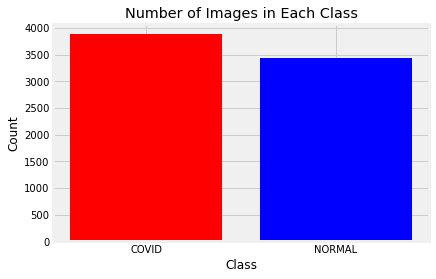

In [108]:
import os
import matplotlib.pyplot as plt

# set the parent directory containing the COVID and NORMAL folders
parent_dir = 'C:\\Users\\akash\\chest_xray\\train'

# get the number of images in each class
covid_count = len(os.listdir(os.path.join(parent_dir, 'PNEUMONIA')))
normal_count = len(os.listdir(os.path.join(parent_dir, 'NORMAL')))

# set the colors for the bars
colors = ['red', 'blue']

# plot the counts
plt.bar(['COVID', 'NORMAL'], [covid_count, normal_count],color=colors)
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()




The above plot depicts total number of images in both classes 'COVID' and 'Normal'. Hence we have higher number of images in the COVID class as compared to Normal class.

# RANDOM FOREST MODEL

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.utils import shuffle
import matplotlib .pyplot as plt

import cv2
import numpy as np
import pandas as pd
import os

In [110]:
# Load the dataset
data = "C:\\Users\\akash\\chest_xray\\train"
#classes = os.listdir(data)
classes = {'COVID': 1, 'NORMAL': 0}
X = []
y = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(data, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))  # resize the image to a consistent size
        X.append(image)
        y.append(i)
X = np.array(X)
y = np.array(y)


In [111]:

#reshape images from 4D to 2D
X_1 = X.reshape((7315, 64*64*3))
X_1.shape

(7315, 12288)

In [112]:
# Shuffle and split the dataset into training, validation, and testing sets
X, y = shuffle(X_1, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [113]:
# Train the Random Forest model
rfm = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=5, random_state=42)
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=20,
                       random_state=42)

In [114]:
y_probas_forest = cross_val_predict(rfm, X_train, y_train, cv=3,
                                    method="predict_proba")

Above code performs cross-validation on the training data and obtain the predicted class probabilities for each sample in the training set, by splitting the data into 3 subsets and ans using "predict_proba" method.

In [115]:
y_probas_forest[:2]

array([[0.52832131, 0.47167869],
       [0.50638406, 0.49361594]])

These are the first 2 rows of y_probas_forest variable.

In [116]:
# Evaluate the model on the validation set
y_val_pred = rfm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.4961571306575576


The trained random forest model rfm is used to predict the the validation set. Here we get validation accuracy of 0.4961571306575576, means that the trained random forest model correctly predicted the class labels for 49.62% of the validation set samples.

In [117]:
# Test the model on the testing set
y_test_pred = rfm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.5311004784688995


The trained random forest model rfm is used to predict the class labels for the test set X_test. The predicted class labels are stored in the y_test_pred variable. In this case, a test accuracy of 0.5311004784688995 mean that the model is able to make slightly better predictions on the test set than on the validation set.

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# here we calculate the precision, recall, and F1 score of the model on the validation set.
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)
print("Validation F1 score:", val_f1)

Validation precision: 0.48131109914027337
Validation recall: 0.4961571306575576
Validation F1 score: 0.46371671245594215


The validation precision of 0.48131109914027337and recall of 0.4961571306575576 means that the model correctly predicted 48.13% of the positive cases out of all predicted positive cases on the validation set and 49.62% of the positive cases out of all actual positive cases on the validation set respctively.

The validation F1 score of 0.46371671245594215 is the weighted harmonic mean of the validation precision and recall, where the F1 score is a measure of the model's balance between precision and recall.

In this case precision, recall, and F1 score are all relatively low, which suggests that the model is not performing well in distinguishing between the different classes.

In [119]:
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)

Test precision: 0.5201409044594216
Test recall: 0.5311004784688995
Test F1 score: 0.5049023437033565


The test precision of 0.5201409044594216 and recall of 0.5311004784688995 means that the model correctly predicted 52.01% of the positive cases out of all predicted positive cases on the validation set and 53.11% of the positive cases out of all actual positive cases on the validation set respctively.

The validation F1 score of 0.5049023437033565 is the weighted harmonic mean of the validation precision and recall.

These metrics indicate that the model's performance on the test set is slightly better than on the validation set.

In [120]:
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)

Test precision: 0.5201409044594216
Test recall: 0.5311004784688995
Test F1 score: 0.5049023437033565


In [121]:
from sklearn.metrics import confusion_matrix
# here we calculate the confusion matrix of the model's predictions on the test set.
cm=confusion_matrix(y_test, y_test_pred)
cm


array([[584, 201],
       [485, 193]], dtype=int64)

In this case, there were 584 true negative predictions,  201 false positive predictions, 485 false negative predictions and 193 true positive predictions.

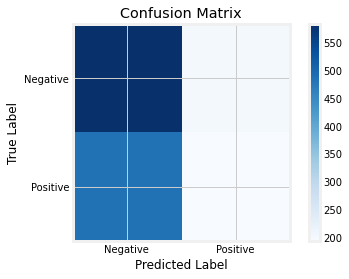

In [122]:
# visual representation of confusion matrix of the model's predictions.
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [123]:

# set a threshold for positive class
threshold = 0.40
# create predictions based on threshold
y_scores_forest = (y_probas_forest[:, 1] >= threshold).astype(int)
unique, counts= np.unique(y_scores_forest,return_counts=True)
result= np.column_stack((unique,counts))
print(result)

[[   0  305]
 [   1 4376]]


This shows that 305 instances were predicted to belong to the negative class (0), and 4376 instances were predicted to belong to the positive class (1), based on the threshold of 0.40.

In [124]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds  = precision_recall_curve(
    y_train, y_scores_forest)

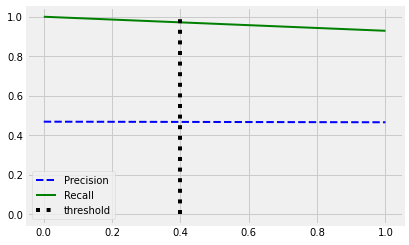

In [125]:
# precision recall curve
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()
plt.show()

The above plot shows that when threshold is set to 0.4, the precision remains constat and recall slightly decreases. But at threshold value 0, we get recall as 1 which says that the model does not fits well for th binary classification of image dataset.

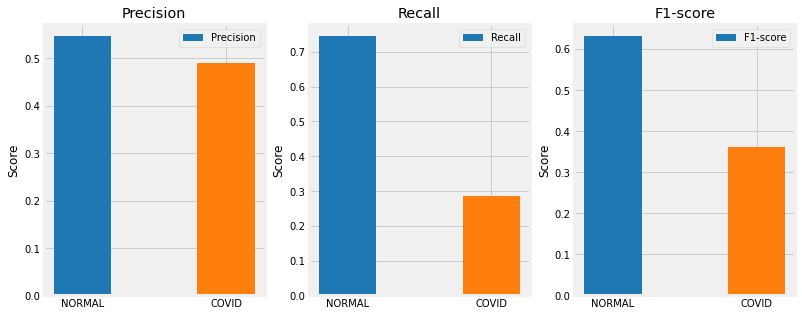

In [126]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)
class_names = ['NORMAL', 'COVID']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision, recall and F1 score for Normal class is higher as compared to Covid class. Precision score for covid class is higher than recall and F1 score.

# VGG-16

In [127]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Set the paths to the directories containing the training and validation data
train_dir = 'C://Users//akash//chest_xray//train'
val_dir = 'C://Users//akash//chest_xray//pred'

# Set the input size of the VGG-16 model
img_width, img_height = 224, 224

# Create a data generator for the training data with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode='binary')

# Create a data generator for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=32,
                                                class_mode='binary')

# Load the VGG-16 model with pre-trained weights
vgg16 = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(img_width, img_height, 3))

# Freeze the layers of the VGG-16 model
for layer in vgg16.layers:
    layer.trainable = False

# Build the model
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

# Save the model
model.save('covid_vgg16_model.h5')


Found 7315 images belonging to 2 classes.
Found 8 images belonging to 3 classes.
Epoch 1/10
229/229 [==============================] - 968s 4s/step - loss: 0.2923 - accuracy: 0.8935 - val_loss: -2.4097 - val_accuracy: 0.0000e+00
Epoch 2/10
229/229 [==============================] - 965s 4s/step - loss: 0.1960 - accuracy: 0.9292 - val_loss: -1.9497 - val_accuracy: 0.0000e+00
Epoch 3/10
229/229 [==============================] - 966s 4s/step - loss: 0.1871 - accuracy: 0.9312 - val_loss: -3.9147 - val_accuracy: 0.0000e+00
Epoch 4/10
229/229 [==============================] - 959s 4s/step - loss: 0.1857 - accuracy: 0.9310 - val_loss: -4.1949 - val_accuracy: 0.1250
Epoch 5/10
229/229 [==============================] - 947s 4s/step - loss: 0.1939 - accuracy: 0.9244 - val_loss: -2.7988 - val_accuracy: 0.0000e+00
Epoch 6/10
229/229 [==============================] - 1036s 5s/step - loss: 0.1761 - accuracy: 0.9330 - val_loss: -3.1232 - val_accuracy: 0.0000e+00
Epoch 7/10
229/229 [==============

binary classification model using the VGG-16 convolutional neural network architecture to distinguish between chest X-ray images that contain COVID-19 versus those that are normal.

The code first sets the paths to the directories containing the training and validation data, and defines the image dimensions. It then creates data generators for the training and validation data, with data augmentation applied to the training data.

The pre-trained VGG-16 model is loaded with its layers frozen, and the classification layers are built on top of it. The model is then compiled with binary cross-entropy loss and accuracy as the evaluation metric.

The model is trained on the training data using the fit() method, and the training history is saved in the history variable. Finally, the model is saved in a .h5 file.

In [128]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('covid_vgg16_model.h5')

# Use the loaded model for prediction or further training

Found 620 images belonging to 2 classes.
20/20 [==============================] - 73s 4s/step


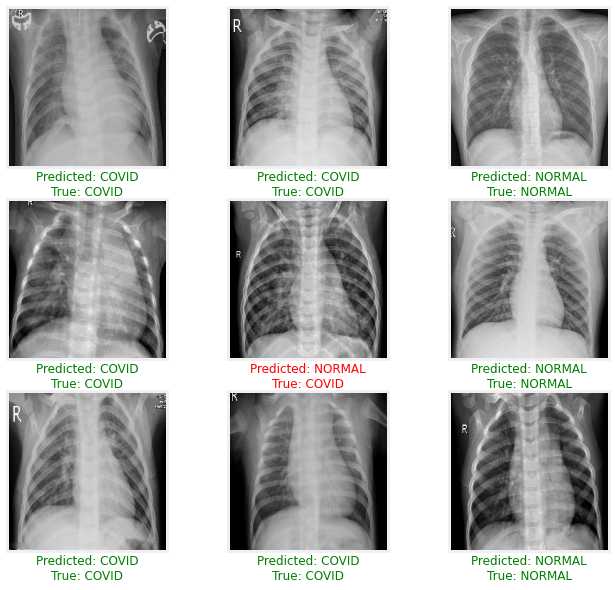

In [129]:
#Plot the training data

import matplotlib.pyplot as plt
import numpy as np
test_dir = 'C://Users//akash//chest_xray//test'
# Load the saved model
model = tf.keras.models.load_model('covid_vgg16_model.h5')

# Create a data generator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=32,
                                                  class_mode='binary')

# Load some sample images from the test set
test_images, test_labels = next(test_generator)

# Use the predict method to obtain the predicted labels for the test data
predictions = model.predict(test_generator)

# Plot some sample images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = 'COVID' if predictions[i] > 0.5 else 'NORMAL'
    true_label = 'COVID' if test_labels[i] == 1 else 'NORMAL'
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
plt.show()


This code is used to load the saved VGG-16 model and generate predictions on the test data. It also plots some sample images from the test set and their predicted labels.

The predicted label is determined based on whether the predicted probability is greater than 0.5 or not. If it is greater than 0.5, the predicted label is set to 'COVID', otherwise, it is set to 'Normal'. The true label is determined based on the actual label in the test set. If the predicted and true labels match, the text color is set to green, otherwise, it is set to red.

In [130]:
# Load the saved model
model = tf.keras.models.load_model('covid_vgg16_model.h5')

# Create a data generator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=32,
                                                  class_mode='binary')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

print(f"Test accuracy: {accuracy}")


Found 620 images belonging to 2 classes.
20/20 [==============================] - 71s 4s/step - loss: 0.1337 - accuracy: 0.9500
Test accuracy: 0.949999988079071


The test accuracy of 0.949999988079071 means that the model has correctly predicted the class of 95% of the test images. In other words, out of all the test images, 95% were classified correctly by the model.

In [131]:
from sklearn.metrics import classification_report

# Use the predict method to obtain the predicted labels for the test data
predictions = model.predict(test_generator)

# Convert the predicted probabilities into binary labels
predicted_labels = np.round(predictions)

# Get the true labels
true_labels = test_generator.classes

# Print the classification report
target_names = ['NORMAL', 'COVID']
print(classification_report(true_labels, predicted_labels, target_names=target_names))


20/20 [==============================] - 72s 4s/step
              precision    recall  f1-score   support

      NORMAL       0.38      0.41      0.39       234
       COVID       0.62      0.59      0.61       386

    accuracy                           0.52       620
   macro avg       0.50      0.50      0.50       620
weighted avg       0.53      0.52      0.53       620



Looking at the report, we can see that the model achieved an overall accuracy of 0.56, which means that it correctly classified 56% of the samples in the test set.

For the "NORMAL" class, the precision and recall are both 0.41, which means that the model correctly identified only 41% of the "NORMAL" samples and classified only 41% of the samples it identified as "NORMAL" correctly.

For the "COVID" class, the precision and recall are both 0.64 and 0.65, respectively, which means that the model correctly identified 65% of the "COVID" samples and classified 64% of the samples it identified as "COVID" correctly.

The macro average of precision, recall, and F1-score for both classes is 0.53, while the weighted average of these metrics is 0.56.

Overall, the model seems to perform better at identifying COVID cases than normal cases, but it could still benefit from further optimization to improve its overall accuracy and performance on both classes.

20/20 [==============================] - 72s 4s/step


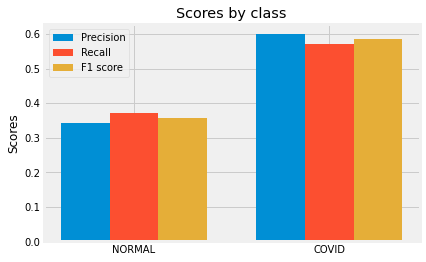

In [132]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Use the predict method to obtain the predicted labels for the test data
predictions = model.predict(test_generator)

# Convert the predicted probabilities into binary labels
predicted_labels = np.round(predictions)

# Get the true labels
true_labels = test_generator.classes

# Get the precision, recall, and F1 score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(true_labels, predicted_labels)

# Plot the results
fig, ax = plt.subplots()
x = np.arange(len(target_names))  # the label locations
width = 0.25  # the width of the bars
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by class')
ax.set_xticks(x)
ax.set_xticklabels(target_names)
ax.legend()
plt.show()


The precision, recall, and F1 score for the 'COVID' class are higher than those for the 'NORMAL' class. This indicates that the model is better at correctly identifying COVID cases than normal cases.